<a href="https://colab.research.google.com/github/ajaynain-eng/2D-to-3D-CNN-Pivotal-Teleradiology/blob/main/Data_analysis_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 import os
 os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [2]:
!kaggle datasets download -d ymirsky/medical-deepfakes-lung-cancer 

100% 5.99G/5.99G [01:27<00:00, 61.9MB/s]
100% 5.99G/5.99G [01:27<00:00, 73.5MB/s]


In [ ]:
!pip install ktrain

In [ ]:
!unzip \*.zip && rm *.zip

In [5]:
!pip install pydicom

     |████████████████████████████████| 1.9MB 4.8MB/s 


In [6]:
# importing supporting libraries
import pandas as pd                    # to create and read data frame and series
import numpy as np                     # to work with array
from matplotlib import pyplot as plt   # to plot figures
import seaborn as sns                  # to plot interactive metric plot and heatmaps
import cv2                             # to read and show image
from skimage.transform import resize   # as we need to resize the image to reduce model complexity and get optimum accuracy

In [7]:
import os
import warnings
import pydicom as dicom
import glob

In [8]:
import scipy.ndimage
from skimage import measure, morphology
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [9]:
# importing required CNN algorithms, optimizers and activation function
import tensorflow as tf
from tensorflow import keras
#from keras.applications import VGG16
from keras import Sequential
from keras.layers import Conv1D, Conv2D, Conv3D, MaxPool3D, ZeroPadding3D, Dropout, BatchNormalization
from keras.layers import Flatten, Dense, Input
from keras.layers import LeakyReLU
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam, SGD
from keras.models import Model
from keras import callbacks
# importing pretrained model VGG16 and VGG19
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19

In [10]:
from skimage import measure
from skimage.transform import resize
from matplotlib.projections import Axes3D
from plotly.figure_factory import create_trisurf
from mpl_toolkits import mplot3d

In [11]:
def transform_to_hu(medical_image, image):
    intercept = medical_image.RescaleIntercept
    slope = medical_image.RescaleSlope
    hu_image = image * slope + intercept
    return hu_image

def window_image(image, window_center, window_width):
    img_min = window_center - window_width // 2
    img_max = window_center + window_width // 2
    window_image = image.copy()
    window_image[window_image < img_min] = img_min
    window_image[window_image > img_max] = img_max
    return window_image

def crop_image(image, display=False):
# Create a mask with the background pixels
    mask = image == 0
# Find the lung area
    coords = np.array(np.nonzero(~mask))
    top_left = np.min(coords, axis=1)
    bottom_right = np.max(coords, axis=1)
# Remove the background
    croped_image = image[top_left[0]:bottom_right[0],
                         top_left[1]:bottom_right[1]]
    return croped_image

def no_crop(medical_img):         # changes the medical image in pixel array and returns the original image
    return medical_img.pixel_array

def crop_the_image_1(medical_img):     # crop the image corresponding to HU range for lungs
    temp_medical_img = medical_img
    temp_img = temp_medical_img.pixel_array
    hu_image = transform_to_hu(temp_medical_img,temp_img)
    lung_image = window_image(hu_image, -500, 1500)
    croped_img = crop_image(lung_image, display=False)
    return croped_img

In [12]:
def get_data(pid, crop_function):         #  Selects and crops 110 slices and give 3D and 2D image data
    files = glob.glob("/content/CT_Scans/EXP1_blind/"+ pid +"/*.dcm")
    slices = [dicom.read_file(i) for i in files]
    slices = sorted(slices, key=lambda s: s.SliceLocation)
    s = 0
    views = np.empty([110,110,110])
    x = (len(slices)-4)/109      # Select 110 slices
    for i in range(110):
        t = int(4+(x*i))
        try:
            t_img = crop_function(slices[t])
            t_img = resize(t_img, (110,110))
        except:
            t_img = crop_function(slices[t-1])
            t_img = resize(t_img, (110,110))
            s = s + 1
        views[:,:,i] = t_img          # 3D image array
        i += 1
    img_2d = views[55,:,:].T
    img_2d = img_2d[::-1]           # 2D image array
    print(s)     
    return views, img_2d

In [13]:
patients_id = os.listdir('/content/CT_Scans/EXP1_blind')

In [14]:
f = patients_id.copy()
g2d_0 = np.zeros((80,110,110))
views_0 = np.zeros((80,110,110,110))
fcount_0 = []
for i,j in enumerate(f):
    print(i)
    img_3d, img_2d = get_data(j, no_crop)
    g2d_0[i] = img_2d
    views_0[i] = img_3d
    #views_0[i] = selected_slices(j, no_crop)
x_0 = g2d_0
y_0 = views_0
np.save('Data_out_0.npy', views_0)              # Temprory storing the data in drive
np.save('Data_in_0.npy', g2d_0)

0
1
1
1
2
1
3
1
4
0
5
1
6
1
7
1
8
1
9
1
10
1
11
1
12
1
13
1
14
1
15
1
16
1
17
1
18
1
19
1
20
1
21
1
22
1
23
1
24
1
25
1
26
1
27
1
28
1
29
1
30
1
31
1
32
1
33
1
34
1
35
1
36
1
37
1
38
1
39
1
40
1
41
1
42
1
43
1
44
0
45
1
46
0
47
1
48
1
49
1
50
1
51
1
52
0
53
1
54
1
55
1
56
1
57
1
58
1
59
0
60
1
61
1
62
1
63
1
64
1
65
1
66
1
67
1
68
1
69
1
70
1
71
1
72
1
73
1
74
1
75
1
76
0
77
1
78
1
79
1


In [15]:
f = patients_id.copy()
g2d_1 = np.zeros((80,110,110))
views_1 = np.zeros((80,110,110,110))
for i,j in enumerate(f):
    print(i)
    img_3d, img_2d = get_data(j, crop_the_image_1)
    g2d_1[i] = img_2d
    views_1[i] = img_3d
    #views_0[i] = selected_slices(j, no_crop)
x_1 = g2d_1
y_1 = views_1
np.save('Data_out_1.npy', views_1)
np.save('Data_in_1.npy', g2d_1)

0
1
1
1
2
1
3
1
4
0
5
1
6
1
7
1
8
1
9
1
10
1
11
1
12
1
13
1
14
1
15
1
16
1
17
1
18
1
19
1
20
1
21
1
22
1
23
1
24
1
25
1
26
1
27
1
28
1
29
1
30
1
31
1
32
1
33
1
34
1
35
1
36
1
37
1
38
1
39
1
40
1
41
1
42
1
43
1
44
0
45
1
46
0
47
1
48
1
49
1
50
1
51
1
52
0
53
1
54
1
55
1
56
1
57
1
58
1
59
0
60
1
61
1
62
1
63
1
64
1
65
1
66
1
67
1
68
1
69
1
70
1
71
1
72
1
73
1
74
1
75
1
76
0
77
1
78
1
79
1


In [16]:
x_0 = np.load('/content/Data_in_0.npy')
y_0 = np.load('/content/Data_out_0.npy')
x_1 = np.load('/content/Data_in_1.npy')
y_1 = np.load('/content/Data_out_1.npy')

In [17]:
def plot_learning_curve(model, epochs):   
    plt.figure(figsize=(15,6))
    plt.plot(np.arange(0,epochs), model.history['accuracy'], color = 'green', label = 'train_accuracy')
    plt.plot(np.arange(0,epochs), model.history['loss'], color = 'red', label = 'train_loss')
    plt.plot(np.arange(0,epochs), model.history['val_accuracy'], color = 'blue', label = 'test_accuracy')
    plt.plot(np.arange(0,epochs), model.history['val_loss'], color = 'black', label = 'test_loss')
    plt.grid()
    plt.xlabel('no. of epochs')
    plt.ylabel('accuracy and loss')
    plt.legend(loc = 'lower right')

def plot_accuracy_curve(model, epochs):    
    plt.figure(figsize=(15,6))
    plt.plot(np.arange(0,epochs), model.history['accuracy'], color = 'green', label='accuracy')
    plt.plot(np.arange(0,epochs), model.history['val_accuracy'], color = 'red', label = 'test accuracy')
    plt.grid()
    plt.legend(loc = 'lower right')

In [18]:
x_train_0 = x_0[:66]
x_test_0 = x_0[65:]
y_train_0 = y_0[:66]
y_test_0 = y_0[65:]

x0 = x_train_0[:,1,:]
y0 = y_train_0[:,:,:,1]          # temp_x = x_0[:][:,1,:], temp_y = y_0[:][:,:,:,1]
x_test0 = x_test_0[:,1,:]
y_test0 = y_test_0[:,:,:,1]
x_train_1 = x_1[:66]
x_test_1 = x_1[65:]
y_train_1 = y_1[:66]
y_test_1 = y_1[65:]

x1 = x_train_1[:,1,:]
y1 = y_train_1[:,:,:,1]
x_test1 = x_test_1[:,1,:]
y_test1 = y_test_1[:,:,:,1]

In [19]:
x_test0 = x_test0.reshape(15,110,1)
x0 = x0.reshape(66,110,1)

x_test1 = x_test1.reshape(15,110,1)
x1 = x1.reshape(66,110,1)

x0.shape, y0.shape

((66, 110, 1), (66, 110, 110))

In [20]:
y_0[0].shape

(110, 110, 110)

In [21]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

In [161]:
def get_correlation(data, threshold):
    corr_col = set()
    corr = data.corr()
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i,j]) > threshold:  #if abs(corr.iloc[i,j]) > threshold:
                corr_col.add(corr.columns[i])
    return corr_col

def get_uncorr_data(train_data, test_data, threshold):

    corr_columns = get_correlation(pd.DataFrame(train_data), threshold)
    print(f'there are {len(corr_columns)} correlated columns with correlation higher than {threshold}','\n')

    corrmat = pd.DataFrame(train_data).corr()

    corrdata = corrmat.stack().sort_values(ascending = False)  #corrdata = corrmat.abs().stack().sort_values(ascending = False)

    corrdata = corrdata[corrdata > threshold]
    corrdata = corrdata[corrdata < 1]
    corrdata = pd.DataFrame(corrdata).reset_index()
    corrdata.columns = ['feature1','feature2', 'value']

    grouped_column_list = []
    correlated_group_list = []
    for column in corrdata['feature1']:
        if column not in grouped_column_list:
            correlated_block = corrdata[corrdata.feature1 == column]
            grouped_column_list = grouped_column_list + list(correlated_block.feature2.unique()) + [column]
            correlated_group_list.append(correlated_block)

    important_columns = []
    for data in correlated_group_list:
        columns = list(data.feature1.unique()) + list(data.feature2.unique())
        important_columns.append(columns[0])

    new_to_drop = list(corr_columns - set(important_columns))

    l = new_to_drop

    columns_to_drop = list()
    for i in l:
        if i not in [0,1,108,109]:
            if (i-1 not in columns_to_drop and i+1 not in columns_to_drop):     ####
                if (i-2 not in columns_to_drop and i+2 not in columns_to_drop):
                    columns_to_drop.append(int(i))

    print(f'total columns which were droped are {len(columns_to_drop)}')

    col_to_drop_df = pd.concat([corrdata, pd.Series(columns_to_drop, name = 'column_to_drop')], axis = 1)

    y_train_grouped_uncorr = pd.DataFrame(y0[0]).drop(columns_to_drop, axis = 1)
    y_test_grouped_uncorr =pd.DataFrame(y_test0[0]).drop(columns_to_drop, axis = 1)
    
    return y_train_grouped_uncorr, y_test_grouped_uncorr, col_to_drop_df

In [162]:
y_train_grouped_uncorr, y_test_grouped_uncorr, col_to_drop_df = get_uncorr_data(y0[0], y_test0[0], 0.96)

there are 104 correlated columns with correlation higher than 0.96 

total columns which were droped are 31


In [24]:
col_to_drop_df.dropna()

,feature1,feature2,value,column_to_drop
0,0,109,0.999921,6.0
1,109,0,0.999921,9.0
2,1,108,0.997669,12.0
3,108,1,0.997669,16.0
4,44,43,0.997449,19.0
5,43,44,0.997449,22.0
6,46,45,0.995738,25.0
7,45,46,0.995738,28.0
8,40,39,0.995547,31.0
9,39,40,0.995547,34.0


In [25]:
col_to_drop = list(col_to_drop_df.dropna().sort_values(by = 'value', ascending=False)['column_to_drop'])

In [26]:
col_to_drop = [int(i) for i in col_to_drop]
col_to_drop.sort()
len(col_to_drop)

31

In [27]:
col_to_drop

[6,
 9,
 12,
 16,
 19,
 22,
 25,
 28,
 31,
 34,
 37,
 41,
 45,
 48,
 51,
 54,
 58,
 61,
 65,
 68,
 71,
 74,
 77,
 80,
 83,
 86,
 89,
 93,
 96,
 99,
 102]

In [28]:
temp_x = x_0[:][:,1,:]
temp_y = y_0[:][:,:,:,1]

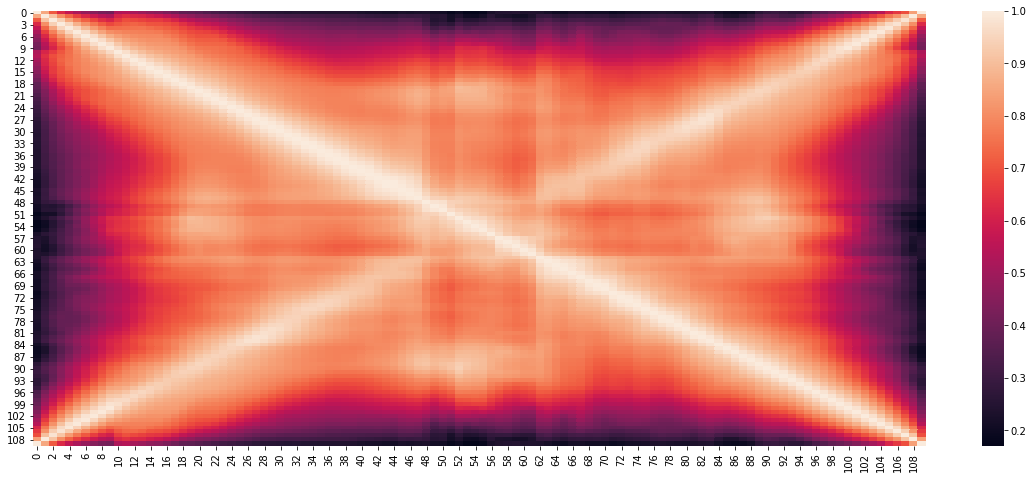

In [29]:
plt.figure(figsize = (20,8))
corrmat = pd.DataFrame(y0[0]).corr()
sns.heatmap(corrmat)

In [30]:
imp_col = list()
droped_col = list()
l = y_train_grouped_uncorr.columns
for i in np.arange(2,108):
    if i not in l:
        droped_col.append(i)
        imp_col.append([i-2,i-1,i+1,i+2])

In [31]:
len(imp_col)

31

In [166]:
imp_col

[[4, 5, 7, 8],
 [7, 8, 10, 11],
 [10, 11, 13, 14],
 [14, 15, 17, 18],
 [17, 18, 20, 21],
 [20, 21, 23, 24],
 [23, 24, 26, 27],
 [26, 27, 29, 30],
 [29, 30, 32, 33],
 [32, 33, 35, 36],
 [35, 36, 38, 39],
 [39, 40, 42, 43],
 [43, 44, 46, 47],
 [46, 47, 49, 50],
 [49, 50, 52, 53],
 [52, 53, 55, 56],
 [56, 57, 59, 60],
 [59, 60, 62, 63],
 [63, 64, 66, 67],
 [66, 67, 69, 70],
 [69, 70, 72, 73],
 [72, 73, 75, 76],
 [75, 76, 78, 79],
 [78, 79, 81, 82],
 [81, 82, 84, 85],
 [84, 85, 87, 88],
 [87, 88, 90, 91],
 [91, 92, 94, 95],
 [94, 95, 97, 98],
 [97, 98, 100, 101],
 [100, 101, 103, 104]]

In [33]:
def get_cross_val_score(droped_col, imp_col,y_train_grouped_uncorr, y_test_grouped_uncorr, y_0, y0, y_test0):    
    rf_score = list()
    rf_score_mean = list()      # diff_1 = droped_col[i] - droped_col[i-1]
    knn_score = list()          # diff_2 = droped_col[i+1] - droped_col[i] - 1
    knn_score_mean = list()     # training_col = imp_col[diff_1:-diff_2]
    knn_neighbors = list()
    neighbors = 2
    estimators = 60
    for i, j in enumerate(droped_col):
        rf = RandomForestRegressor(n_estimators=40, random_state=0)
        rf.fit(y_train_grouped_uncorr[[j-1,j+1]] + y0[0][:,j:j+1], pd.DataFrame(y0[0])[j])
        rf_score.append((rf.score(y_test_grouped_uncorr[[j-1,j+1]] + y_test0[0][:,j:j+1], pd.DataFrame(y_test0[0])[j]))*100)
        rf_val_score = np.array(cross_val_score(rf, pd.DataFrame(y_0[0])[imp_col[i]] + y0[0][:,j:j+1], pd.DataFrame(y_0[0])[j]))
        #rf_score += list(rf_val_score)*100
        rf_score_mean.append(rf_val_score.mean()*100)
        knn_val_score = cross_val_score(KNeighborsRegressor(n_neighbors=neighbors), pd.DataFrame(y_0[0])[imp_col[i]] + y_0[0][:,j:j+1], pd.DataFrame(y_0[0])[j])
        mean = knn_val_score.mean()*100
        m = list()
        n = list()
        p = list()
        if mean < 0.95:
            for k, o in enumerate([4, 6, 8, 10,12, 24]):
                scr = cross_val_score(KNeighborsRegressor(n_neighbors=o), pd.DataFrame(y_0[0])[imp_col[i]] + y_0[0][:, j:j+1], pd.DataFrame(y_0[0])[j])
                m.append(o)
                n.append(scr.mean())
                p.append(scr)
            max_arg = np.array(n).argmax()
            knn_neighbors.append(m[max_arg])
            mean = n[max_arg]*100
        else:
            knn_neighbors.append(2)
        knn_score_mean.append(mean)
        #[try int(str(i)[:6]) except list(i)*100 for i in knn_val_score]
    for i,j in enumerate(droped_col):
        knn = KNeighborsRegressor(n_neighbors=knn_neighbors[i])
        knn.fit(y_train_grouped_uncorr[[j-1,j+1]] + y0[0][:,j:j+1], pd.DataFrame(y0[0])[j])
        knn_score.append((knn.score(y_test_grouped_uncorr[[j-1,j+1]] + y_test0[0][:,j:j+1], pd.DataFrame(y_test0[0])[j]))*100)
        #rf.fit(y_train_grouped_uncorr[imp_col[i]] + y0[0][:,droped_col[i]:imp_col[i][1]], pd.DataFrame(y0[0])[droped_col[i]])      # + y0[0][:,3:4]
        #score = rf.score(y_test_grouped_uncorr[imp_col[i]] + y_test0[0][:,droped_col[i]:imp_col[i][1]], pd.DataFrame(y_test0[0])[droped_col[i]])
    return rf_score ,rf_score_mean, knn_score, knn_score_mean, knn_neighbors

In [34]:
rf_score ,rf_score_mean, knn_score, knn_score_mean, knn_neighbors = get_cross_val_score(droped_col, imp_col,y_train_grouped_uncorr, y_test_grouped_uncorr, y_0[:,:,:,1], y0, y_test0)

In [35]:
len(rf_score), len(rf_score_mean), len(knn_score), len(knn_score_mean)

(31, 31, 31, 31)

In [154]:
y_train_grouped_uncorr.shape

(110, 79)

In [36]:
rf_score_mean_new = [i for i in rf_score_mean if i>=0]

In [37]:
len(rf_score_mean_new)

27

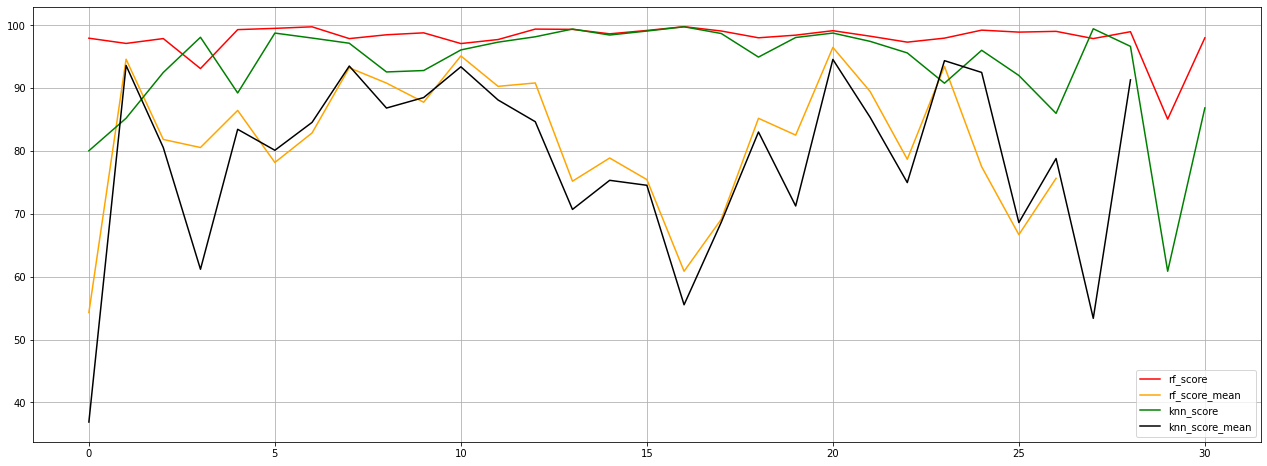

In [38]:
plt.figure(figsize=(22,8))
plt.plot(np.arange(0,len(rf_score)), rf_score, color = 'red', label = 'rf_score')
plt.plot(np.arange(0,len(rf_score_mean_new)), rf_score_mean_new, color = 'orange', label = 'rf_score_mean')
plt.plot(np.arange(0,len(knn_score)), knn_score, color = 'green', label = 'knn_score')
plt.plot(np.arange(0,len(knn_score_mean)-2), knn_score_mean[2:], color = 'black', label = 'knn_score_mean')
plt.legend()
plt.grid()
plt.show()

In [39]:
for i in range(len(knn_score_mean)):
    print(f'{rf_score_mean[i]} , {knn_score_mean[i]}')

-265.39552706340686 , 87.68086162960695
-9.96803492974502e+24 , -6.926472749175961e+25
54.30061441244772 , 36.877766100901226
94.5966928065747 , 93.60678897204811
81.83436441116238 , 80.54947597424494
80.54972735863608 , 61.17919515704898
86.45132582065959 , 83.44779147703638
78.169853833926 , 80.11056581729484
82.86941769730586 , 84.55202746177815
93.23679018775411 , 93.51229716850442
90.80126565983669 , 86.82810328567786
87.75703435679813 , 88.49897426016122
95.11819459252983 , 93.3923600925102
90.28082143356492 , 88.11195198094225
90.82123494454501 , 84.65752902736489
75.1893266773184 , 70.70130220067696
78.8814101901336 , 75.33283158225647
75.44665585208385 , 74.540331517927
60.86359758359849 , 55.53173616971239
69.14047206817962 , 68.66985364827342
85.19672196642836 , 83.0177555257434
82.52579257238285 , 71.25096822113522
96.47910952128187 , 94.56598454058354
89.47207171042824 , 85.36991521478672
78.68274914567569 , 74.97245514041904
93.45315388911126 , 94.36746729926503
77.484889

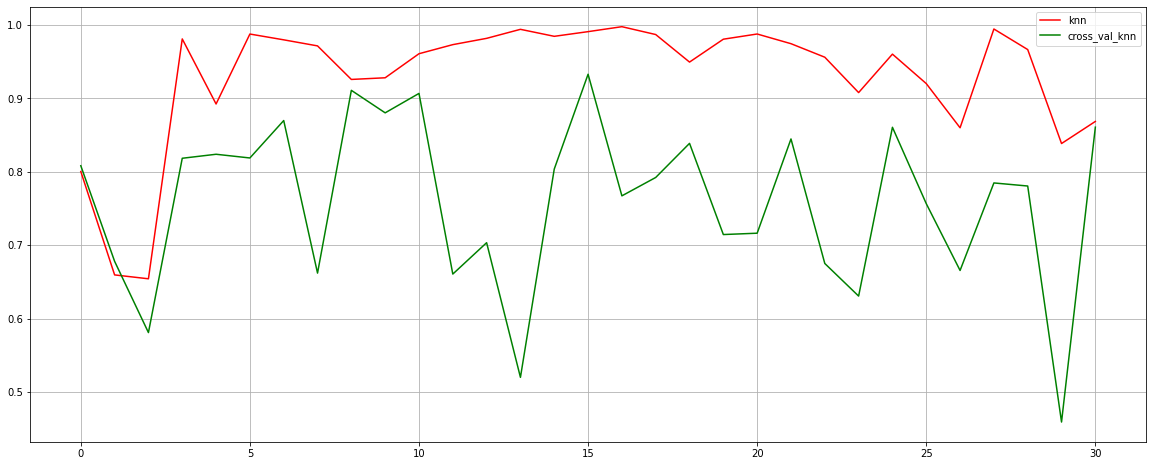

In [40]:
scr1 = list()
droped_col_knn_score = list()
droped_col_cross_knn_score = list()
for j,i in enumerate(col_to_drop):
    knn = KNeighborsRegressor(n_neighbors=2)
    knn.fit(y_train_grouped_uncorr[[i-1,i+1]] + y0[0][:,i:i+1], pd.DataFrame(y0[0])[i])      # + y0[0][:,3:4]   + y0[0][:,4:5]
    droped_col_knn_score.append(knn.score(y_test_grouped_uncorr[[i-1,i+1]] + y_test0[0][:,i:i+1], pd.DataFrame(y_test0[0])[i]))

    knn = KNeighborsRegressor(n_neighbors=knn_neighbors[j])
    knn.fit(pd.DataFrame(temp_x[:60])[[i-2,i-1,i+1,i+2]], pd.DataFrame(temp_x[:60])[i])             #  + pd.DataFrame(temp_x[:60])[i]
    scr = list()
    for j in range(1,6):
        s1 = 16*(j-1)                                                                       # [s1:s2] 
        s2 = 16*j
        scr.append(knn.score(pd.DataFrame(temp_x[s1:s2])[[i-2,i-1,i+1,i+2]], pd.DataFrame(temp_x[s1:s2])[i]))    #  + pd.DataFrame(temp_x[s1:s2])[i]
    droped_col_cross_knn_score.append(np.array(scr).mean())
    scr1.append(scr)
plt.figure(figsize=(20,8))
plt.plot(np.arange(0,len(droped_col_knn_score)), droped_col_knn_score, color = 'red', label = 'knn')
plt.plot(np.arange(0,len(droped_col_cross_knn_score)), droped_col_cross_knn_score, color = 'green', label = 'cross_val_knn')
plt.legend()
plt.grid()

In [41]:
for i in scr1:
    print(i)

[0.8833591720871998, 0.9582529380462402, 0.9096837120232417, 0.9187834559285257, 0.3707618928823777]
[0.7607851126292451, 0.7120161849926144, 0.4572178677175447, 0.7396021558491133, 0.7201173208784601]
[0.3527811823283259, 0.6981848487833071, 0.6329344683842426, 0.6183192444452006, 0.6025120908312878]
[0.971517942170779, 0.8883700119309271, 0.8899615063587817, 0.9144009388744008, 0.42754315032658563]
[0.9483152622941498, 0.8394089930549964, 0.8249259597585121, 0.6888055153992995, 0.8175785274612442]
[0.6504100091202575, 0.8003629126367653, 0.8564177776337856, 0.9032887888367921, 0.8832972945061567]
[0.9552611007499311, 0.8635958294764122, 0.8595481432672285, 0.9241961550038097, 0.746030276572655]
[0.32845310133970007, 0.9103224630383018, 0.8220829812448739, 0.66112944725455, 0.5877412978928053]
[0.8836828489734287, 0.963491450999655, 0.7424884404882289, 0.9806851101306328, 0.9840501593992409]
[0.8485088335022837, 0.9508534821872618, 0.7660877721789081, 0.9361308629504592, 0.89956656814

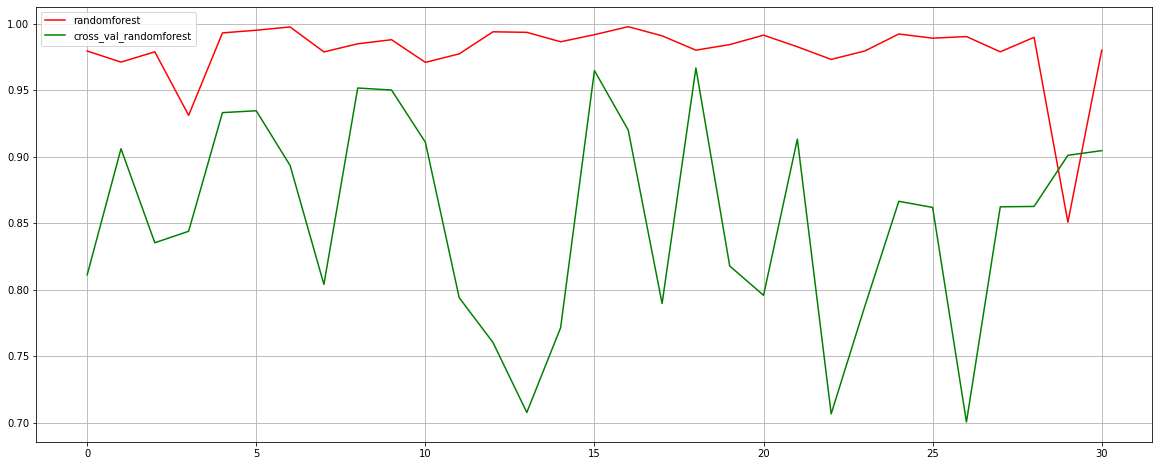

In [42]:
scr2 = list()
droped_col_rf_score = list()
droped_col_cross_rf_score = list()
for i in col_to_drop:
    rf = RandomForestRegressor(n_estimators=40, random_state=0)
    rf.fit(y_train_grouped_uncorr[[i-1,i+1]] + y0[0][:,i:i+1], pd.DataFrame(y0[0])[i])      # + y0[0][:,3:4]   + y0[0][:,4:5]
    droped_col_rf_score.append(rf.score(y_test_grouped_uncorr[[i-1,i+1]] + y_test0[0][:,i:i+1], pd.DataFrame(y_test0[0])[i]))

    rf = RandomForestRegressor(n_estimators=60, random_state=0)
    rf.fit(pd.DataFrame(temp_x[:60])[[i-2,i-1,i+1,i+2]], pd.DataFrame(temp_x[:60])[i])             #  + pd.DataFrame(temp_x[:60])[i]
    scr = list()
    for j in range(1,6):
        s1 = 16*(j-1)                                                                       # [s1:s2] 
        s2 = 16*j
        scr.append(rf.score(pd.DataFrame(temp_x[s1:s2])[[i-2,i-1,i+1,i+2]], pd.DataFrame(temp_x[s1:s2])[i]))    #  + pd.DataFrame(temp_x[s1:s2])[i]
    droped_col_cross_rf_score.append(np.array(scr).mean())
    scr2.append(scr)
plt.figure(figsize=(20,8))
plt.plot(np.arange(0,len(droped_col_rf_score)), droped_col_rf_score, color = 'red', label = 'randomforest')
plt.plot(np.arange(0,len(droped_col_cross_rf_score)), droped_col_cross_rf_score, color = 'green', label = 'cross_val_randomforest')
plt.legend()
plt.grid()

In [43]:
for i in scr2:
    print(i)

[0.9349979202056384, 0.9328953973559093, 0.9735378761436319, 0.8467303542441259, 0.36723031920052485]
[0.9780353505964535, 0.9642173538765239, 0.9273467460317102, 0.9637056488144997, 0.6964227910798939]
[0.933503266117915, 0.9727339194480787, 0.7055055376755353, 0.8754709142405774, 0.6889243613968441]
[0.9453699473434939, 0.9486149775960953, 0.9197009764449906, 0.9525034800173757, 0.4530602912151974]
[0.9743293484933957, 0.9406400607388086, 0.8999100968438963, 0.9439421850010513, 0.9067217760274169]
[0.9133937952393256, 0.9652717357165684, 0.8976833872079725, 0.9814738717074298, 0.9146451577880202]
[0.8969396134135542, 0.8744711210639632, 0.9203031955172192, 0.9790947780837143, 0.7959726797596263]
[0.7099707861506857, 0.9387450532249395, 0.8874103648278526, 0.8061124141007082, 0.6772458467527951]
[0.9533527740954642, 0.9708925045088324, 0.9459116034788259, 0.9793954276853265, 0.9084922262260635]
[0.9515322530873456, 0.9804552381690019, 0.9369109735398601, 0.9821213913444209, 0.89937060

In [44]:
score_df = pd.DataFrame({'col_to_drop' : col_to_drop, 'rf_score' : rf_score, 'rf_score_mean' : rf_score_mean, 'knn_score' : knn_score, 'knn_score_mean' : knn_score_mean})

In [45]:
score_df.sort_values(by='rf_score', ascending=False)

,col_to_drop,rf_score,rf_score_mean,knn_score,knn_score_mean
16,58,99.773285,7.888141e+01,99.756573,7.533283e+01
6,25,99.752608,8.645133e+01,97.966624,8.344779e+01
5,22,99.507528,8.054973e+01,98.755446,6.117920e+01
12,45,99.389461,9.511819e+01,98.168003,9.339236e+01
13,48,99.347988,9.028082e+01,99.397010,8.811195e+01
4,19,99.305098,8.183436e+01,89.228534,8.054948e+01
24,83,99.223928,7.868275e+01,96.018722,7.497246e+01
15,54,99.173768,7.518933e+01,99.081570,7.070130e+01
20,71,99.136147,8.519672e+01,98.759962,8.301776e+01
17,61,99.086354,7.544666e+01,98.687046,7.454033e+01


In [46]:
pd.concat([col_to_drop_df.dropna()['value'], score_df], axis = 1)

,value,col_to_drop,rf_score,rf_score_mean,knn_score,knn_score_mean
0,0.999921,6,97.942613,-2.653955e+02,80.032223,8.768086e+01
1,0.999921,9,97.110253,-9.968035e+24,85.208881,-6.926473e+25
2,0.997669,12,97.882486,5.430061e+01,92.489271,3.687777e+01
3,0.997669,16,93.109318,9.459669e+01,98.089397,9.360679e+01
4,0.997449,19,99.305098,8.183436e+01,89.228534,8.054948e+01
5,0.997449,22,99.507528,8.054973e+01,98.755446,6.117920e+01
6,0.995738,25,99.752608,8.645133e+01,97.966624,8.344779e+01
7,0.995738,28,97.876421,7.816985e+01,97.140303,8.011057e+01
8,0.995547,31,98.485221,8.286942e+01,92.572191,8.455203e+01
9,0.995547,34,98.794162,9.323679e+01,92.797484,9.351230e+01


In [48]:
l1 = list(score_df.sort_values(by='rf_score_mean', ascending=False)['col_to_drop'])
l2 = list(score_df.sort_values(by='rf_score', ascending=False)['col_to_drop'])
l3 = list(score_df.sort_values(by='knn_score_mean', ascending=False)['col_to_drop'])
l4 = list(score_df.sort_values(by='knn_score', ascending=False)['col_to_drop'])

In [49]:
pd.DataFrame({'drop_by_rf_mean': l1, 'drop_by_rf' : l2, 'drop_by_knn_mean' : l3, 'drop_by_knn' : l4})

,drop_by_rf_mean,drop_by_rf,drop_by_knn_mean,drop_by_knn
0,77,58,77,58
1,45,25,86,93
2,16,22,16,48
3,86,45,34,54
4,34,48,45,71
5,51,19,89,22
6,37,83,102,61
7,48,54,41,51
8,80,71,48,45
9,41,61,6,16


it should be wise to drop correlated colunms based on mean knn score as knn represents the how closely the nearby pixels are to each other.

In [50]:
droped_col = list(score_df.sort_values(by='knn_score_mean', ascending=False)['col_to_drop'])[:22]
droped_col.sort()
droped_col

[6,
 16,
 19,
 25,
 28,
 31,
 34,
 37,
 41,
 45,
 48,
 51,
 58,
 61,
 71,
 77,
 80,
 83,
 86,
 89,
 96,
 102]

In [155]:
y_train_grouped_uncorr = pd.DataFrame(y0[0]).drop(droped_col, axis = 1)
y_test_grouped_uncorr =pd.DataFrame(y_test0[0]).drop(droped_col, axis = 1)

In [156]:
y_train_grouped_uncorr.shape, y_test_grouped_uncorr.shape

((110, 88), (110, 88))

In [51]:
from skimage import measure

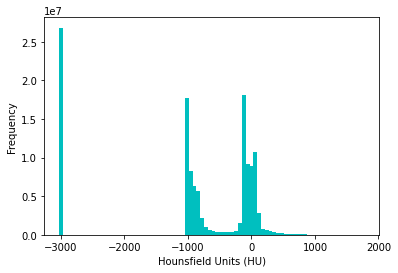

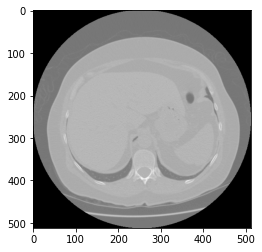

In [52]:
def load_scan(path):
    slices = [dicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: float(x.ImagePositionPatient[2]))
    try:
        slice_thickness = np.abs(slices[0].ImagePositionPatient[2] - slices[1].ImagePositionPatient[2])
    except:
        slice_thickness = np.abs(slices[0].SliceLocation - slices[1].SliceLocation)
        
    for s in slices:
        s.SliceThickness = slice_thickness
        
    return slices

def get_pixels_hu(slices):
    image = np.stack([s.pixel_array for s in slices])
    # Convert to int16 (from sometimes int16), 
    # should be possible as values should always be low enough (<32k)
    image = image.astype(np.int16)

    # Set outside-of-scan pixels to 0
    # The intercept is usually -1024, so air is approximately 0
    image[image == -2000] = 0
    
    # Convert to Hounsfield units (HU)
    for slice_number in range(len(slices)):
        
        intercept = slices[slice_number].RescaleIntercept
        slope = slices[slice_number].RescaleSlope
        
        if slope != 1:
            image[slice_number] = slope * image[slice_number].astype(np.float64)
            image[slice_number] = image[slice_number].astype(np.int16)
            
        image[slice_number] += np.int16(intercept)
    
    return np.array(image, dtype=np.int16)


INPUT_FOLDER = '/content/CT_Scans/EXP1_blind/'
patients = os.listdir(INPUT_FOLDER)
patients.sort()

first_patient = load_scan(INPUT_FOLDER + patients[0])     # /content/CT_Scans/EXP1_blind/1003
first_patient_pixels = get_pixels_hu(first_patient)
plt.hist(first_patient_pixels.flatten(), bins=80, color='c')
plt.xlabel("Hounsfield Units (HU)")
plt.ylabel("Frequency")
plt.show()

# Show some slice in the middle
plt.imshow(first_patient_pixels[80], cmap=plt.cm.gray)
plt.show()


In [53]:

def resample(image, scan, new_spacing=[1,1,1]):
    # Determine current pixel spacing
    spacing = np.empty((1,3))
    spacing[0,0] = float(scan[0].SliceThickness)
    spacing[0,1] = scan[0].PixelSpacing[0]
    spacing[0,2] = scan[0].PixelSpacing[1]

    resize_factor = spacing / new_spacing
    new_real_shape = image.shape * resize_factor
    new_shape = np.round(new_real_shape)
    real_resize_factor = new_shape / image.shape
    new_spacing = spacing / real_resize_factor
    
    image = scipy.ndimage.interpolation.zoom(image, real_resize_factor, mode='nearest')
    
    return image, new_spacing

def plot_3d(image, threshold=-300):
    
    # Position the scan upright, 
    # so the head of the patient would be at the top facing the camera
    p = image.transpose(2,1,0)
    
    verts, faces = measure.marching_cubes_classic(p, threshold)

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Fancy indexing: `verts[faces]` to generate a collection of triangles
    mesh = Poly3DCollection(verts[faces], alpha=0.70)
    face_color = [0.45, 0.45, 0.75]
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)

    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])

    plt.show()

In [54]:
first_patient[0].PixelSpacing    #  (first_patient[0].SliceThickness) + first_patient[0].PixelSpacing

[0.703125, 0.703125]

In [55]:
arr = np.empty((1,3))
arr[0,0] = float(first_patient[0].SliceThickness)
arr[0,1] = first_patient[0].PixelSpacing[0]
arr[0,2] = first_patient[0].PixelSpacing[1]
arr

array([[0.625   , 0.703125, 0.703125]])

In [56]:
#pix_resampled, spacing = resample(first_patient_pixels, first_patient, [1,1,1])

In [58]:
#plot_3d(pix_resampled, 400)

In [59]:
pd.read_csv('/content/Response EXP1 - AI_instances.csv')

,type,uuid,slice,x,y,detected,detected_diam,label
0,FB,1280,100,323,381,False,0.000000,True
1,FB,1009,76,354,288,False,0.000000,True
2,FB,7794,79,163,191,False,0.000000,True
3,FB,7794,94,338,243,False,0.000000,True
4,FB,2997,45,156,135,False,0.000000,True
...,...,...,...,...,...,...,...,...
128,TM,7507,201,316,362,True,8.464684,True
129,TM,7507,319,125,323,True,14.526845,True
130,TM,2190,48,147,379,True,8.705275,True
131,TM,2190,213,141,336,True,18.149607,True


No handles with labels found to put in legend.


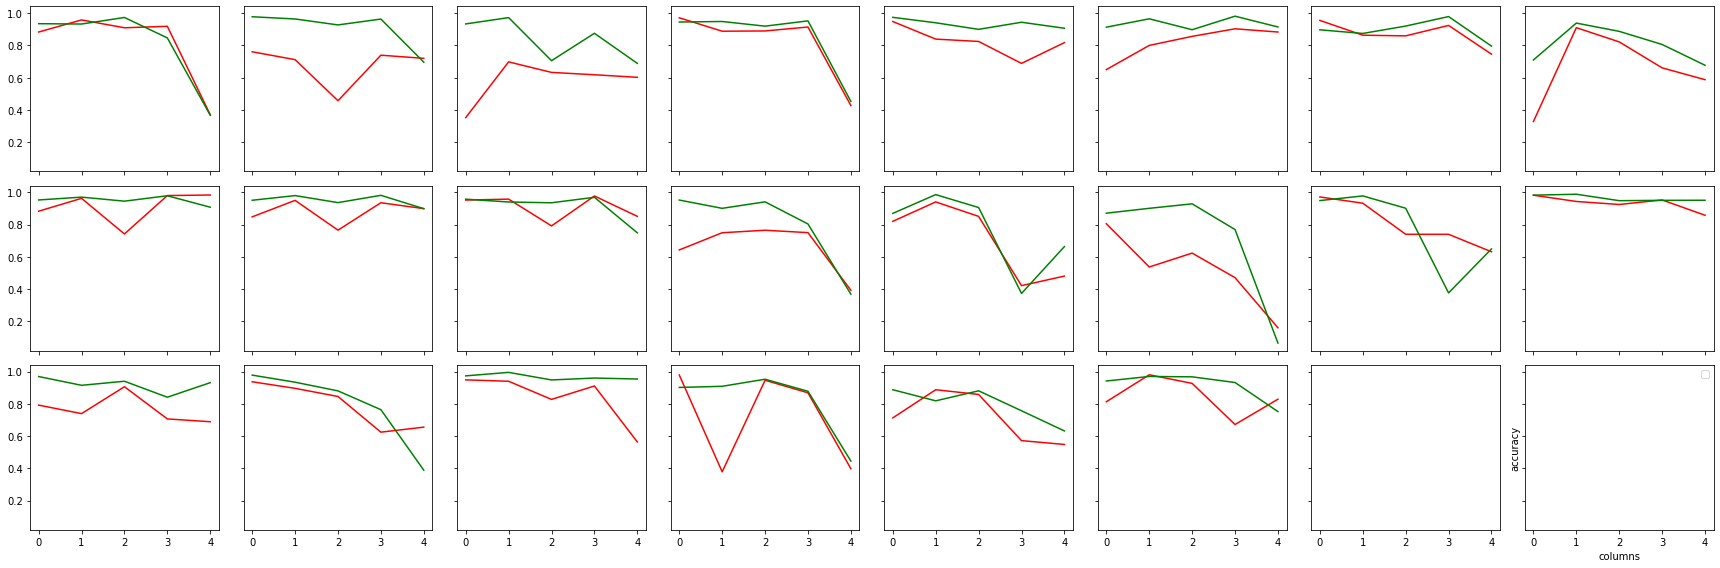

In [60]:
fig, axe  = plt.subplots(3,8,sharex=True, sharey=True, figsize = (24,8))
plt.xlabel('columns')
plt.ylabel('accuracy')
for i in range(3):
    for j in range(8):
        s = i*8 + j
        if s < 22:
            axe[i,j].plot(scr1[s], color = 'red', label = 'knn')
            axe[i,j].plot(scr2[s], color = 'green', label = 'random forest')
            fig.tight_layout()
plt.legend()

In [61]:
pd.DataFrame(temp_x).drop(col_to_drop, axis = 1) #+ pd.DataFrame(temp_x)[col_to_drop]

,0,1,2,3,4,5,7,8,10,11,13,14,15,17,18,20,21,23,24,26,27,29,30,32,33,35,36,38,39,40,42,43,44,46,47,49,50,52,53,55,56,57,59,60,62,63,64,66,67,69,70,72,73,75,76,78,79,81,82,84,85,87,88,90,91,92,94,95,97,98,100,101,103,104,105,106,107,108,109
0,0.000199,-0.000783,0.002232,0.019688,0.004395,-0.001918,-0.003166,0.000162,0.006726,0.001537,0.001377,0.003164,0.002628,-0.001690,-0.004945,-0.004066,-0.002400,-0.001626,-0.003164,-0.002995,-0.004318,-0.003508,-0.002824,-0.003241,-0.003292,-0.000607,-0.000564,-0.001641,-0.001171,-0.000973,-0.001693,-0.003139,-0.001782,0.000805,0.002743,0.022224,0.021833,0.018496,0.018688,0.000907,0.000073,0.000335,0.001618,-0.001571,-0.002254,0.000021,0.001905,0.001977,0.000864,0.020237,0.017605,0.013535,0.015555,-0.000632,-0.000916,0.001171,0.000051,-0.000487,-0.002750,-0.003569,-0.003024,-0.002066,0.001053,0.002317,0.002163,0.002257,-0.003089,-0.003250,-0.003181,-0.003106,-0.003437,-0.003265,-0.002974,-0.002901,-0.002457,-0.002405,-0.014649,-0.026646,-0.026996
1,-0.002519,-0.002807,-0.003137,-0.003431,-0.003614,-0.003847,-0.002113,-0.001310,0.011701,0.037473,0.007919,-0.003599,-0.003040,-0.002616,-0.000719,0.000315,-0.000317,-0.000266,0.000294,0.002455,0.001811,0.000770,0.001221,0.001528,0.002002,-0.001414,-0.002869,-0.002559,-0.001502,-0.001902,-0.002978,-0.002759,-0.002221,0.002306,0.003153,-0.000706,0.005294,-0.007404,0.001181,0.000643,0.009192,0.003957,-0.002535,-0.003004,-0.002606,-0.002833,-0.002201,0.000988,0.003303,0.002521,0.002027,0.001750,0.000784,-0.000272,-0.001146,-0.002389,-0.001962,-0.000540,-0.000697,0.000875,0.000749,-0.000716,-0.001365,-0.000246,0.000329,0.000950,-0.000359,-0.001321,-0.001961,-0.002434,-0.002349,-0.002072,-0.000128,0.000319,-0.007205,-0.010682,-0.017235,-0.024429,-0.028575
2,-0.002899,-0.003302,-0.001422,0.001309,0.001728,0.001793,0.001781,0.001367,0.007553,0.006706,0.005466,0.005068,0.004351,0.003816,0.004276,0.011251,0.004469,0.001430,-0.000049,-0.001620,0.001078,-0.001189,-0.000878,-0.002218,-0.002359,0.025735,0.017468,0.017367,0.016504,-0.000121,0.000876,0.001047,0.000908,-0.000363,-0.000233,0.004355,0.004138,0.008000,0.010126,0.008707,0.008583,0.009339,0.008348,0.007959,0.007078,0.007600,0.003865,0.001004,0.000098,-0.000303,0.000444,0.000462,0.000153,-0.001451,0.001206,0.021942,0.021856,-0.004165,-0.003539,0.018665,0.011242,0.005914,0.001286,0.002203,0.002667,0.002171,0.005509,0.003621,0.003025,0.003287,0.005610,0.004312,0.006310,0.003678,0.002846,0.003446,0.001486,0.002468,0.002420
3,-0.002989,-0.003267,-0.003864,-0.002632,-0.000094,0.005692,0.010145,0.006666,0.000448,0.000253,0.000231,0.000383,0.000461,-0.000277,-0.000208,0.001649,0.008262,0.014896,0.015861,0.016787,0.001341,-0.002614,-0.003374,-0.001551,0.000298,-0.000566,-0.000079,0.000369,0.001092,0.001005,-0.000045,-0.000474,0.000413,0.004655,0.006522,0.006819,0.007575,0.007615,0.005707,0.003536,0.002668,0.006588,0.005741,0.004780,0.008918,0.011237,0.013733,0.017345,0.017669,0.007461,-0.000253,0.000117,-0.001262,-0.003951,-0.003000,0.010614,0.023105,0.012580,0.004722,-0.002208,-0.002309,0.001931,0.009168,0.004539,0.004841,0.000763,0.002663,0.007897,0.001217,0.000167,-0.000397,-0.001213,-0.001495,-0.001872,-0.000687,0.000749,0.001517,0.001472,0.003985
4,0.001758,0.000764,0.001233,0.000588,-0.001444,-0.001719,-0.000832,-0.000482,-0.000062,-0.000259,-0.001366,-0.000741,0.000419,-0.000167,0.000796,0.001115,0.000799,0.000295,-0.000464,-0.000782,0.001269,0.001668,-0.000446,0.000915,0.000796,0.000917,0.000646,0.000197,-0.000793,-0.001289,-0.001316,0.000281,0.000063,0.001652,0.001551,0.004120,0.006580,0.006038,0.004706,0.002530,0.002008,0.001680,0.000763,-0.000683,-0.001319,-0.001530,0.000040,0.001345,0.001463,0.000523,0.000545,0.002570,0.005297,0.002146,0.001952,0.001837,0.001403,0.000170,-0.001574,-0.004974,-0.004588,-0.001061,0.000628,0.001291,0.001791,0.001996,0.001423,0.000077,0.000873,0.000989,0.001071,0.001108,0.001387,0.000991,0.001139,0.000850,0.001102,0.000333,-0.001853
...,...,...,...,...,...,...,...,...,.

In [63]:
x0[0][:,0].shape, y0[0][:,0].shape

((110,), (110,))

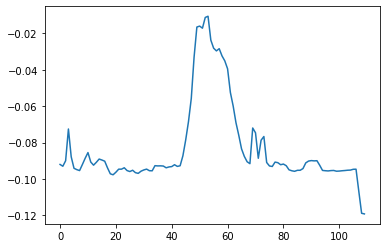

In [64]:
plt.plot(x0[0][:,0]+ y0[0][:,0])

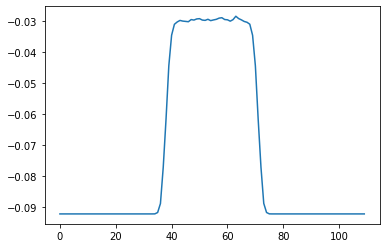

In [65]:
plt.plot(y_train_grouped_uncorr[2])

In [71]:
len(droped_col)

22

In [66]:
droped_col_rf_score = list()
for i in droped_col:
    rf = RandomForestRegressor(n_estimators=40, random_state=0)
    rf.fit(y_train_grouped_uncorr[[i-1,i+1]] + y0[0][:,i:i+1], pd.DataFrame(y0[0])[i])      # + y0[0][:,3:4]   + y0[0][:,4:5]
    s = rf.score(y_test_grouped_uncorr[[i-1,i+1]] + y_test0[0][:,i:i+1], pd.DataFrame(y_test0[0])[i])    #  + y_test0[0][:,4:5]
    droped_col_rf_score.append(s)

In [67]:
droped_col_knn_score = list()
for i in droped_col:
    knn = KNeighborsRegressor(n_neighbors=2)
    knn.fit(y_train_grouped_uncorr[[i-1,i+1]] + y0[0][:,i:i+1], pd.DataFrame(y0[0])[i])      # + y0[0][:,3:4]   + y0[0][:,4:5]
    s = knn.score(y_test_grouped_uncorr[[i-1,i+1]] + y_test0[0][:,i:i+1], pd.DataFrame(y_test0[0])[i])    #  + y_test0[0][:,4:5]
    droped_col_knn_score.append(s)

In [68]:
droped_col_knn_score_2 = list()
for i in droped_col:
    knn = KNeighborsRegressor(n_neighbors=4)
    try:
        knn.fit(y_train_grouped_uncorr[[i-2,i-1,i+1,i+2]] + y0[0][:,i:i+1], pd.DataFrame(y0[0])[i])      # + y0[0][:,3:4]   + y0[0][:,4:5]
        s = knn.score(y_test_2_grouped_uncorr[[i-2,i-1,i+1,i+2]] + y_test0[0][:,i:i+1], pd.DataFrame(y_test0[0])[i])    #  + y_test0[0][:,4:5]
    except:
        knn.fit(y_train_grouped_uncorr[[i-1,i+1]] + y0[0][:,i:i+1], pd.DataFrame(y0[0])[i])      # + y0[0][:,3:4]   + y0[0][:,4:5]
        s = knn.score(y_test_grouped_uncorr[[i-1,i+1]] + y_test0[0][:,i:i+1], pd.DataFrame(y_test0[0])[i])    #  + y_test0[0][:,4:5]
    droped_col_knn_score_2.append(s)

Text(0, 0.5, 'score')

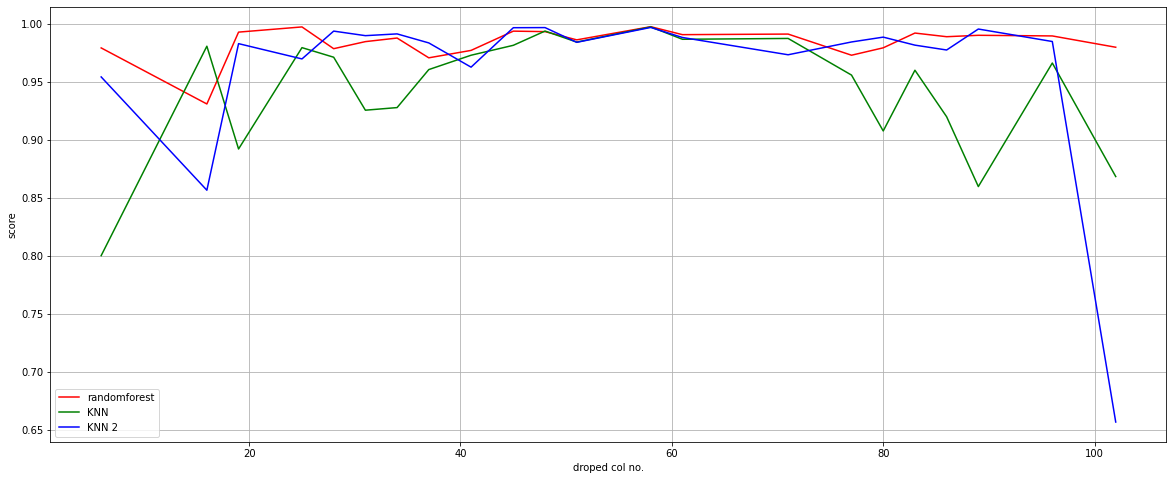

In [69]:
plt.figure(figsize=(20,8))
plt.plot(droped_col, droped_col_rf_score, color = 'red', label = 'randomforest')
plt.plot(droped_col, droped_col_knn_score, color = 'green', label = 'KNN')
plt.plot(droped_col, droped_col_knn_score_2, color = 'blue', label = 'KNN 2')
plt.legend()
plt.grid()
plt.xlabel('droped col no.')
plt.ylabel('score')

In [70]:
rf_score = list()
rf_score_mean = list()
knn_score = list()
knn_score_mean = list()
for i in droped_col:
    knn = KNeighborsRegressor(n_neighbors=2)
    rf = RandomForestRegressor(n_estimators=30)
    rf_val_score = cross_val_score(rf, y_train_grouped_uncorr[[i-1,i+1]] + y0[0][:,i:i+1], pd.DataFrame(y0[0])[i])
    #rf_val_score = [int(i[:6]) for i in rf_val_score]
    rf_score.append(list(rf_val_score)*100)
    rf_score_mean.append(rf_val_score.mean()*100)
    knn_val_score = cross_val_score(knn, y_train_grouped_uncorr[[i-1,i+1]] + y0[0][:,i:i+1], pd.DataFrame(y0[0])[i])
    l = []
    for i in knn_val_score:
        try:
            l.append(int(str(i)[:6]))
        except:
            l.append(i)
    #[try int(str(i)[:6]) except list(i)*100 for i in knn_val_score]
    knn_score.append(l*100)
    knn_score_mean.append(np.array(l).mean()*100)

In [72]:
d = dict()
d['RandomForest_score'] = rf_score
d['RandomForest_mean_score'] = rf_score_mean
d['rf'] = np.array(droped_col_rf_score)*100
d['KNN_score'] = knn_score
d['KNN_score_mean'] = knn_score_mean
d['knn'] = np.array(droped_col_knn_score)*100
df_score = pd.DataFrame(d)

In [73]:
df_score

,RandomForest_score,RandomForest_mean_score,rf,KNN_score,KNN_score_mean,knn
0,"[-3.0, 0.9997207451342807, 0.6677343541557756,...",-66.663692,97.942613,"[1.0, 0.9923485353480956, 0.5449277111268636, ...",90.598737,80.032223
1,"[0.9994183821199648, 0.9881913419231543, 0.661...",92.691943,93.109318,"[0.99034379721131, 0.996667829761202, 0.545209...",90.049872,98.089397
2,"[0.9991476268915319, 0.9514711932807018, 0.610...",85.222527,99.305098,"[0.9964548552439783, 0.9778720259117878, 0.407...",75.747993,89.228534
3,"[0.99581325718748, 0.9396851279868151, 0.58761...",88.842100,99.752608,"[0.9949324651940691, 0.8920660828459364, 0.450...",85.483113,97.966624
4,"[0.9978724007173525, 0.8706124635353147, 0.764...",80.894055,97.876421,"[0.9940260976088586, 0.8746914859799777, 0.685...",79.757262,97.140303
5,"[0.9958525264926653, 0.9609605643127312, 0.426...",81.873124,98.485221,"[0.9955120276473934, 0.9764893115085098, 0.373...",81.070476,92.572191
6,"[0.9983705616556794, 0.9747905411601459, 0.725...",93.440084,98.794162,"[0.9962862398413832, 0.9826324926400861, 0.772...",94.401709,92.797484
7,"[0.9949559177584034, 0.9871954659929244, 0.525...",89.332377,97.088805,"[0.9949208918270877, 0.986135387767233, 0.4462...",87.976001,96.074792
8,"[0.9796207881533847, 0.9866526602189679, 0.854...",89.370560,97.728410,"[0.9720566387523621, 0.9883929430359757, 0.871...",88.699523,97.311804
9,"[0.9700479286714864, 0.9082332626605647, 0.933...",94.809585,99.389461,"[0.934272985720525, 0.9024851791139644, 0.9386...",93.293985,98.168003


Text(0, 0.5, 'score')

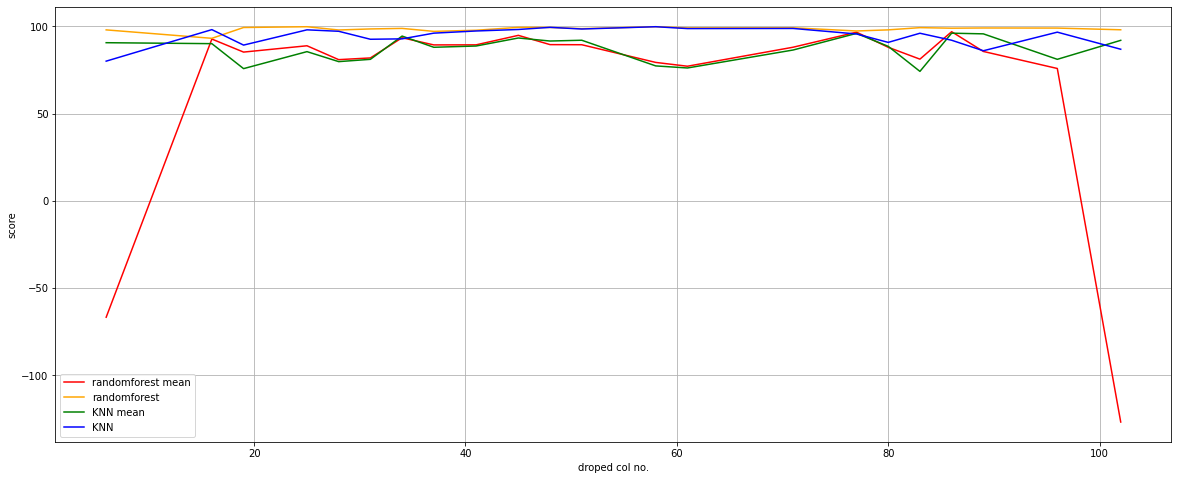

In [74]:
plt.figure(figsize=(20,8))
plt.plot(droped_col, df_score.RandomForest_mean_score, color = 'red', label = 'randomforest mean')
plt.plot(droped_col, df_score.rf, color = 'orange', label = 'randomforest')
plt.plot(droped_col, df_score.KNN_score_mean, color = 'green', label = 'KNN mean')
plt.plot(droped_col, df_score.knn, color = 'blue', label = 'KNN')
plt.legend()
plt.grid()
plt.xlabel('droped col no.')
plt.ylabel('score')

In [75]:
print(len(df_score[df_score['KNN_score_mean'] < df_score['RandomForest_mean_score']]))

14


In [76]:
print(len(df_score[df_score['knn'] < df_score['rf']]))

20


In [77]:
df_score['knn'].mean(), df_score['rf'].mean()

(94.4688207285173, 98.40264905494624)

In [78]:
df_score['KNN_score_mean'].mean(), df_score['RandomForest_mean_score'].mean()

(86.99323897111519, 70.48131828199867)

In [94]:
rf_score = list()
rf_score_mean = list()
knn_score = list()
knn_score_mean = list()
for i in droped_col:
    knn = KNeighborsRegressor(n_neighbors=2)
    rf = RandomForestRegressor(n_estimators=30)
    rf.fit(y_train_grouped_uncorr[[i-1,i+1]], pd.DataFrame(y0[0])[i])
    rf_score.append(rf.score(y_test_grouped_uncorr[[i-1,i+1]], pd.DataFrame(y_test0[0])[i])*100)
    rf_val_score = cross_val_score(rf, y_train_grouped_uncorr[[i-1,i+1]], pd.DataFrame(y0[0])[i])
    #rf_val_score = [int(i[:6]) for i in rf_val_score]
    #rf_score.append(list(rf_val_score)*100)
    rf_score_mean.append(rf_val_score.mean()*100)
    knn.fit(y_train_grouped_uncorr[[i-1,i+1]], pd.DataFrame(y0[0])[i])
    knn_score.append(knn.score(y_test_grouped_uncorr[[i-1,i+1]], pd.DataFrame(y_test0[0])[i])*100)
    knn_val_score = cross_val_score(knn, y_train_grouped_uncorr[[i-1,i+1]], pd.DataFrame(y0[0])[i])
    l = []
    for i in knn_val_score:
        try:
            l.append(int(str(i)[:6]))
        except:
            l.append(i)
    #[try int(str(i)[:6]) except list(i)*100 for i in knn_val_score]
    #knn_score.append(l*100)
    knn_score_mean.append(np.array(l).mean()*100)

In [95]:
len(rf_score), len(rf_score_mean), len(knn_score), len(knn_score_mean)

(22, 22, 22, 22)

In [96]:
df_score = pd.DataFrame({'rf_score' : rf_score, 'rf_score_mean' : rf_score_mean, 'knn_score' : knn_score, 'knn_score_mean' : knn_score_mean})
df_score

,rf_score,rf_score_mean,knn_score,knn_score_mean
0,97.639210,-129.095799,-47.753041,58.566111
1,98.400371,85.093098,49.376335,79.373619
2,98.159966,-61.639170,72.050235,-47.853275
3,95.806884,51.822382,77.869847,34.042547
4,97.423244,38.874835,95.730578,30.153673
5,97.028753,54.965066,85.979417,55.681122
6,97.451396,59.310777,91.198087,40.681058
7,98.696916,37.867133,95.450514,27.520076
8,98.524824,65.965440,98.200327,76.545897
9,99.443698,84.793778,99.211358,85.209985


Text(0, 0.5, 'score')

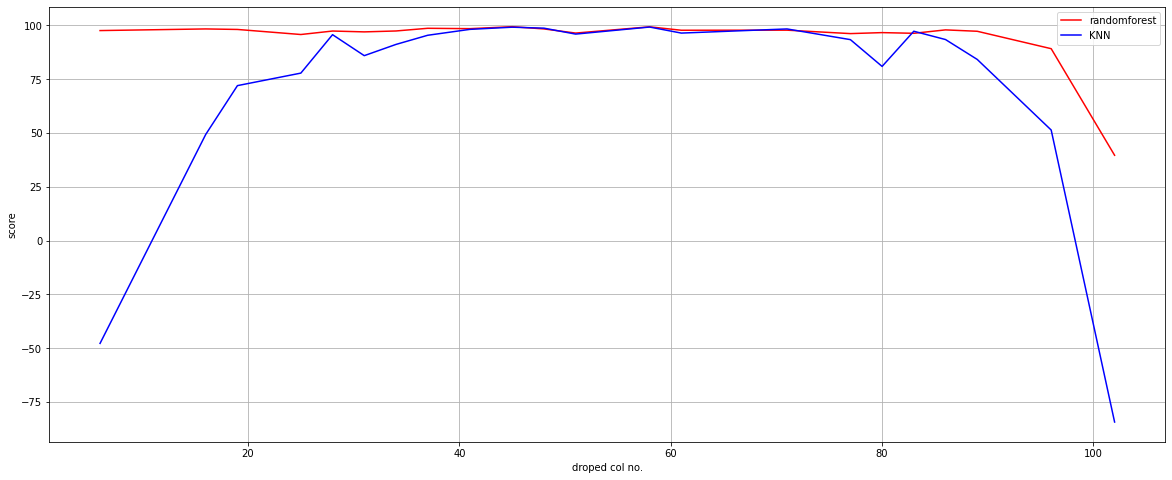

In [97]:
plt.figure(figsize=(20,8))
plt.plot(droped_col, df_score.rf_score, color = 'red', label = 'randomforest')
#plt.plot(droped_col, df_score.rf_score_mean, color = 'orange', label = 'randomforest mean')
#plt.plot(droped_col, df_score.knn_score_mean, color = 'green', label = 'KNN mean')
plt.plot(droped_col, df_score.knn_score, color = 'blue', label = 'KNN')
plt.legend()
plt.grid()
plt.xlabel('droped col no.')
plt.ylabel('score')

In [101]:
np.mean(rf_score)

94.63223586854348

In [106]:
def select_slices(y_0, ):
    for i in range(0,110):


In [158]:
len(y_train_0)

66

In [157]:
y_train_0.shape

(66, 110, 110, 110)

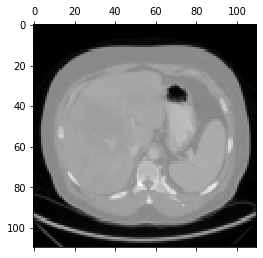

In [124]:
plt.matshow(y0[44], cmap = 'gray')

In [122]:
y_train_0[:,:,:,1].shape                # 1 for 1st slice

(66, 110, 110)

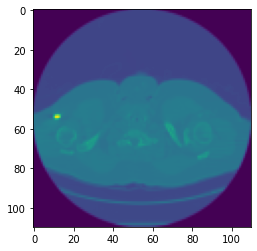

In [131]:
plt.imshow(y_train_0[:,:,:,109][1])

In [151]:
temp_x = y_train_0[:,:,:,5:7] + 10
temp_y = y_train_0[:,:,:,4] + 10

In [152]:
temp_x.shape, temp_y.shape

((66, 110, 110, 2), (66, 110, 110))

In [144]:
temp_x.max(), temp_y.min()

(10.0922594639039, 9.907789730678264)

In [153]:
model_1 = Sequential()
model_1.add(Conv2D(filters=2, kernel_size=(3,3), padding="same", activation='relu', input_shape = [110,110,2]))
model_1.add(Conv2D(filters=2, kernel_size=(3,3), padding="same", activation='relu'))
#model_1.add(Conv2D(filters=4, kernel_size=(3,3), padding="same", activation='relu'))
#model_1.add(Conv2D(filters=2, kernel_size=(3,3), padding="same", activation='relu'))
model_1.add(Conv2D(filters=1, kernel_size=(3,3), padding="same", activation='relu'))
model_1.compile(loss = 'mean_squared_error', optimizer= 'adam', metrics = ['accuracy'])
history = model_1.fit(temp_x, temp_y, batch_size=32, epochs = 20)

Epoch 1/20
3/3 [==============================] - 1s 148ms/step - loss: 99.0981 - accuracy: 0.0000e+00
Epoch 2/20
3/3 [==============================] - 1s 142ms/step - loss: 99.0016 - accuracy: 0.0000e+00
Epoch 3/20
3/3 [==============================] - 1s 144ms/step - loss: 98.9131 - accuracy: 0.0000e+00
Epoch 4/20
3/3 [==============================] - 1s 144ms/step - loss: 98.8018 - accuracy: 0.0000e+00
Epoch 5/20
3/3 [==============================] - 1s 150ms/step - loss: 98.6921 - accuracy: 0.0000e+00
Epoch 6/20
3/3 [==============================] - 1s 141ms/step - loss: 98.5679 - accuracy: 0.0000e+00
Epoch 7/20
3/3 [==============================] - 1s 139ms/step - loss: 98.4362 - accuracy: 0.0000e+00
Epoch 8/20
3/3 [==============================] - 1s 142ms/step - loss: 98.2962 - accuracy: 0.0000e+00
Epoch 9/20
3/3 [==============================] - 1s 141ms/step - loss: 98.0896 - accuracy: 0.0000e+00
Epoch 10/20
3/3 [==============================] - 1s 149ms/step - loss: 

In [ ]:
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(y_train_0[:,:,:,4], y_train_0[:,:,:,5])
knn.score(y_test_0[:,:,:,4], y_test_0[:,:,:,5])

In [103]:
vgg_16 = VGG16(input_shape=(110,65,3), include_top=False)
vgg_16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 110, 65, 3)]      0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 110, 65, 64)       1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 110, 65, 64)       36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 55, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 55, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 55, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 27, 16, 128)       0     

In [105]:
for layer in vgg_16.layers[:10]:
    layer.trainable = False
input = vgg.layers[:5]
model = Sequential()
model.add(Conv2D(filters=3, kernel_size=(3,3), padding="same", activation='relu', input_shape = (110,110,3)))    #LeakyReLU(alpha=1)
model.add(input[0])
model.add(input[1])
model.add(input[2])


model.add(Conv2D(filters=110, kernel_size=(3,3), padding="same", activation='relu'))
model.add(Conv2D(filters=89, kernel_size=(3,3), padding="same", activation='relu'))
#model.add(x[3])
#model.add(x[4])
#model = Model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 110, 110, 3)       84        
_________________________________________________________________
input_1 (InputLayer)         multiple                  0         
_________________________________________________________________
block1_conv1 (Conv2D)        multiple                  1792      
_________________________________________________________________
block1_conv2 (Conv2D)        multiple                  36928     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 110, 110, 110)     63470     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 110, 110, 89)      88199     
Total params: 190,473
Trainable params: 190,473
Non-trainable params: 0
________________________________________________

In [ ]:
model.compile(loss = 'mean_squared_error', optimizer= 'adam', metrics = ['accuracy']) 
history = model.fit(x, y, batch_size=32, epochs = 20)